# Write a MATLAB/Python program to read coins.png, leveling all coins and display area of all coins.

In [4]:
import matplotlib.pyplot as plt


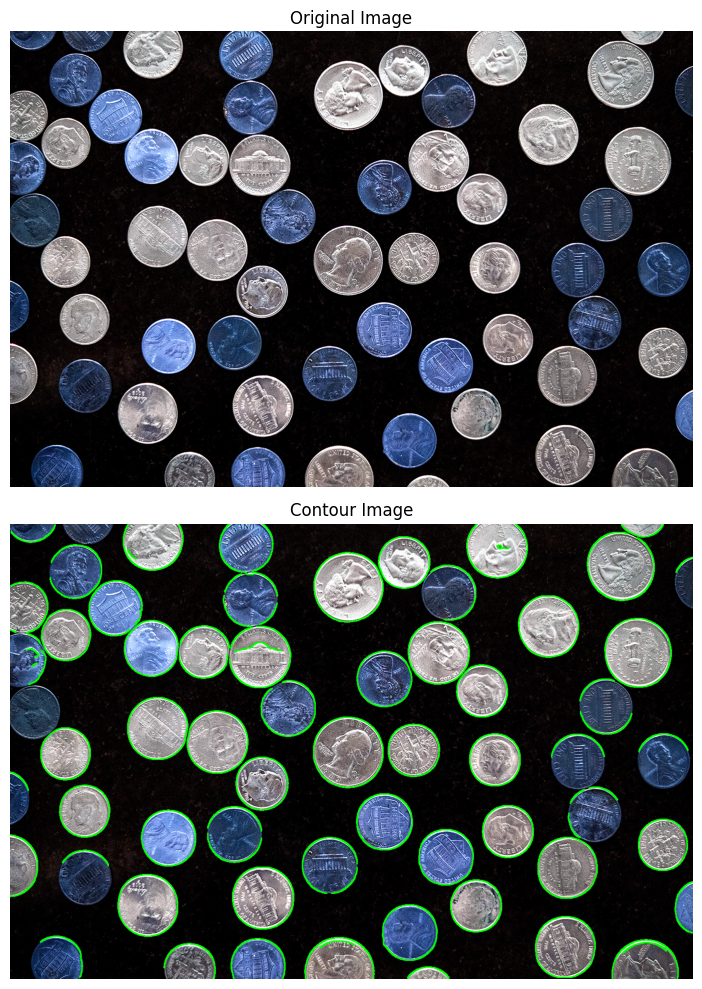

Total Area:  282103.0


In [3]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread("coin2.jpg", cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and enhance edge detection
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Perform edge detection using Canny
edges = cv2.Canny(blurred, threshold1=100, threshold2=175)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw contours
contour_image = image.copy()

total = 0
# Loop over the contours
for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)
    total += area
    # Draw the contour on the image
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)
    
    # Display the area of each coin
    coin_area = f"{area:.2f} sq. units"
    x, y, _, _ = cv2.boundingRect(contour)
    # cv2.putText(contour_image, coin_area, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the images
plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(212)
plt.imshow(contour_image, cmap='gray')
plt.title("Contour Image")
plt.axis('off')
plt.tight_layout()
plt.show()

print('Total Area: ', total)
